In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import os
import fnmatch
import matplotlib.pyplot as plt
import utils
import progressbar
from plotting import plot_place_fields

In [5]:
df = pd.DataFrame({'alg': [], 'seed': [], 'beta': [], 'recall': [], 'num_eps_to_optimality': [], 'wall_clock_time': []})

for pklstring in progressbar.progressbar(fnmatch.filter(os.listdir('logs'), '*.pkl')):
    pklfile = open('logs/' + pklstring, 'rb')
    logs = pickle.load(pklfile)
    pklfile.close()
    data = pd.DataFrame({
        'alg': [logs.config['agent']], 
        'seed': [logs.config['seed']], 
        'beta': [logs.config['beta']], 
        'recall': [logs.config['num_recall']],
        'num_eps_to_optimality': [logs.logs['num_eps_to_optimality']],
        'wall_clock_time': [logs.logs['wall_clock_time']]
    })
    df = pd.concat([df, data])
    
df = df.reset_index()
del df['index']
df['log_recall'] = np.log(df['recall'])

100% (500 of 500) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


In [6]:
df

,alg,seed,beta,recall,num_eps_to_optimality,wall_clock_time,log_recall
0,dyna,5.0,5.0,1.0,91.0,6.362349,0.000000
1,dyna,0.0,0.0,100.0,288.0,57.906214,4.605170
2,dyna,7.0,0.0,30.0,354.0,47.773919,3.401197
3,dyna,7.0,0.0,1.0,123.0,8.970519,0.000000
4,dyna,6.0,0.0,3.0,126.0,9.309862,1.098612
...,...,...,...,...,...,...,...
495,ps,6.0,5.0,10.0,76.0,5.845528,2.302585
496,ps,8.0,5.0,1.0,46.0,2.751616,0.000000
497,ps,4.0,5.0,30.0,86.0,17.967274,3.401197
498,ps,2.0,0.0,1.0,70.0,3.923842,0.000000


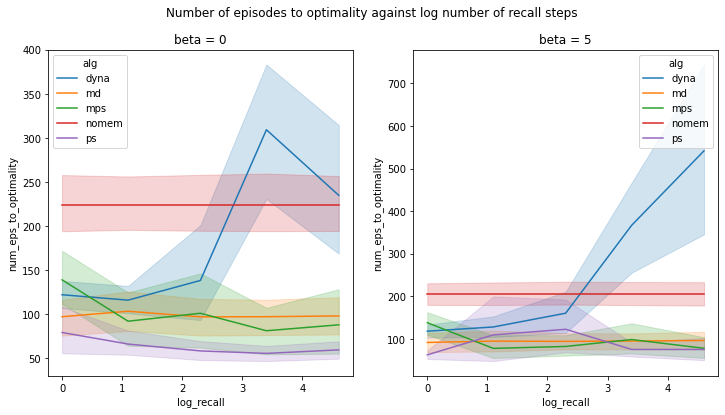

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Number of episodes to optimality against log number of recall steps')
sns.lineplot(ax=ax1, data=df[df['beta'] == 0], x='log_recall', y='num_eps_to_optimality', hue='alg')
ax1.set_title('beta = 0');
sns.lineplot(ax=ax2, data=df[df['beta'] == 5], x='log_recall', y='num_eps_to_optimality', hue='alg')
ax2.set_title('beta = 5');

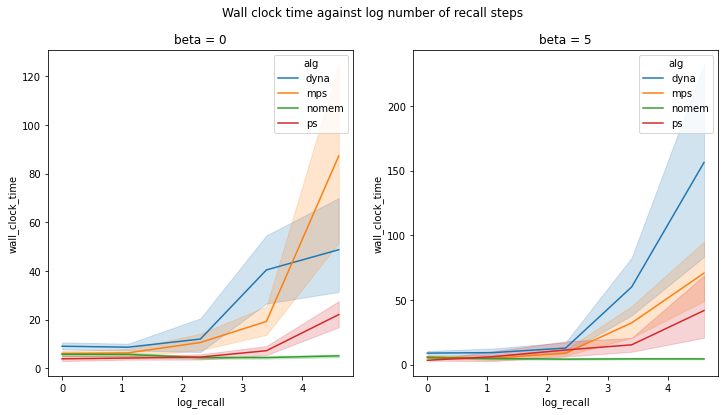

In [9]:
df2 = df[df['alg'] != 'md']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Wall clock time against log number of recall steps')
sns.lineplot(ax=ax1, data=df2[df2['beta'] == 0], x='log_recall', y='wall_clock_time', hue='alg')
ax1.set_title('beta = 0');
sns.lineplot(ax=ax2, data=df2[df2['beta'] == 5], x='log_recall', y='wall_clock_time', hue='alg')
ax2.set_title('beta = 5');